In [1]:
import NDEToolkit as ndt

### Class

In [100]:
from scipy.signal import find_peaks
import numpy as np

class gateManager:

    def __init__(self):

        pass

    def ifGate(self,signal,ff1,ff2,method = "max",lim = 0):

        boundaries = [ff1,ff2]
        
        window = signal[boundaries[0]:boundaries[1]]

        if method == "max":

            result = window.max()

            if result >= lim:

                return result

            return 0
        
        elif method == "first":

            peaks, values = find_peaks(window,height=lim)

            return values['peak_heights'][0]


    def negativeGate(self,signal,ff1,ff2,method = "max",lim = 0):

        boundaries = [ff1,ff2]
        
        window = signal[boundaries[0]:boundaries[1]]

        def fun(x):

            if (x > lim):

                return 0
            
            return x

        limiter = np.vectorize(fun)

        window = limiter(window)

        if method == "max":

            return window.max()
        
        elif method == "first":

            peaks, values = find_peaks(window, height=0)

            return values['peak_heights'][0]



### Load data

In [3]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

tiff_folder = folder_to_read /   r'20210407_phase_vols/0_phase_10MHz/COUPON7_PHASE_10MHz'

data = ndt.napari_read_tiff(tiff_folder,folder=True)
data.shape

(221, 224, 1082)

### If Gate

Using saved


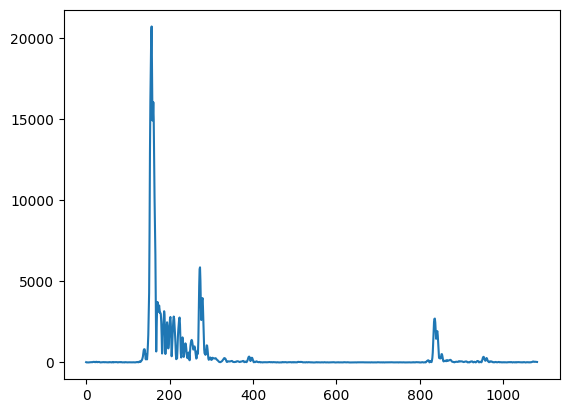

In [13]:
import matplotlib.pyplot as plt
signal = data[177,178]
analyze = ndt.RfAnalyze(signal)
analytic = analyze.analytic()
envelope = analyze.envelope()
plt.plot(envelope)

In [103]:
gm = gateManager()

#### Max method

In [58]:
gm.ifGate(envelope,150,200,lim=50,method="max")

20731.387531211683

#### First peak method

In [57]:
gm.ifGate(envelope,150,200,lim=50,method="first")

20731.387531211683

##### Negative Gate

In [104]:
gm.negativeGate(envelope,800,900,lim=3000, method = 'first')

18.695057940468562